# Gradient Descent

## Author: Himanshu Singhal

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import scipy.linalg as la

# Rosebrock function (valley or banana function)

In [2]:
# Defining the function
def rosen(x):
    """Generalized n-dimensional version of the Rosenbrock function"""
    return sum(100*(x[1:]-x[:-1]**2.0)**2.0 +(1-x[:-1])**2.0)

# Derivative of Rosenbrock function

In [3]:
# Taking the derivative of the function to minimize
def rosen_der(x):
    """Derivative of generalized Rosen function."""
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

# Visualize the function

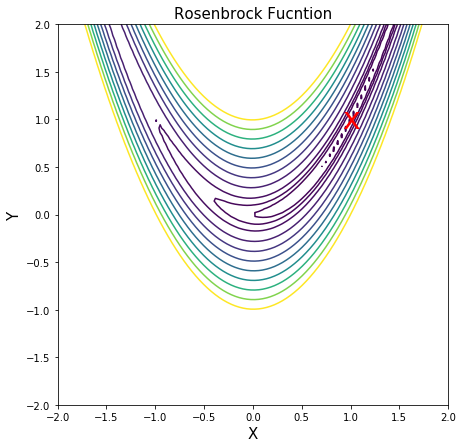

In [4]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Note: the global minimum is at (1,1)

#visualize the rosenbrock function
plt.figure(figsize=(7,7))
levels = [0.1,1,2,4,9, 16, 25, 36, 49, 64, 81, 100]
Z = (1-X)**2 + 100*(Y-X**2)**2
c = plt.contour(X, Y, Z, levels)
plt.text(1, 1, 'x', va='center', ha='center', color='red', fontsize=30)
plt.title('Rosenbrock Fucntion', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
pass


# Vanilla SGD

In [5]:
# Defining the SGD function for Rosenbrock function
def sgd_ros(fun, x0, args=(), maxfev=None, alpha=0.0002,
        maxiter=100000, tol=1e-10, callback=None, **options):
    """Implements simple gradient descent for the Rosen function."""
    bestx = x0
    bestf = fun(x0)
    funcalls = 1
    niter = 0
    improved = True
    stop = False

    while improved and not stop and niter < maxiter:
        niter += 1
        # the next 2 lines are for stochastic gradient descent
        step = alpha * rosen_der(bestx)
        bestx = bestx - step

        bestf = fun(bestx)
        funcalls += 1

        if la.norm(step) < tol:
            improved = False
        if callback is not None:
            callback(bestx)
        if maxfev is not None and funcalls >= maxfev:
            stop = True
            break

    return opt.OptimizeResult(fun=bestf, x=bestx, nit=niter,
                              nfev=funcalls, success=(niter > 1))

# SGD with Momentum

In [6]:
def sgd_momentum_ros(fun, x0, args=(), maxfev=None, alpha=0.0002,beta=0.9,
        maxiter=100000, tol=1e-10, callback=None, **options):
    """Implements gradient descent with Momentum for the Rosen function."""
    bestx = x0
    bestf = fun(x0)
    funcalls = 1
    niter = 0
    v = 0
    improved = True
    stop = False

    while improved and not stop and niter < maxiter:
        niter += 1
        
        # the next 4 lines are for stochastic gradient descent with Momentum
        v = beta*v + (1-beta)*rosen_der(bestx)
        vc = v/(1+beta**(niter))
        step = alpha * vc
        bestx = bestx - step
        
        bestf = fun(bestx)
        funcalls += 1

        if la.norm(step) < tol:
            improved = False
        if callback is not None:
            callback(bestx)
        if maxfev is not None and funcalls >= maxfev:
            stop = True
            break

    return opt.OptimizeResult(fun=bestf, x=bestx, nit=niter,
                              nfev=funcalls, success=(niter > 1))

# SGD with ADAM

In [7]:
def sgd_adam_ros(fun, x0, args=(), maxfev=None, alpha=0.0002,beta=0.9, beta2=0.8, eps=1e-8,
        maxiter=100000, tol=1e-10, callback=None, **options):
    """Implements gradient descent with ADAM for the Rosen function."""
    bestx = x0
    bestf = fun(x0)
    funcalls = 1
    niter = 0
    v = 0
    m = 0
    improved = True
    stop = False

    while improved and not stop and niter < maxiter:
        niter += 1
        
        # the next 6 lines are for stochastic gradient descent with ADAM
        m = beta*m + (1-beta)*rosen_der(bestx)
        v = beta2*v + (1-beta2)*rosen_der(bestx)**2
        mc = m/(1+beta**(niter))
        vc = v/(1+beta2**(niter))
        step =  alpha * m / (eps + np.sqrt(vc))
        bestx = bestx - step

        bestf = fun(bestx)
        funcalls += 1

        if la.norm(step) < tol:
            improved = False
        if callback is not None:
            callback(bestx)
        if maxfev is not None and funcalls >= maxfev:
            stop = True
            break

    return opt.OptimizeResult(fun=bestf, x=bestx, nit=niter,
                              nfev=funcalls, success=(niter > 1))

In [8]:
def reporter(p):
    """Reporter function to capture intermediate states of optimization."""
    global ps
    ps.append(p)

# Initial Position

In [9]:
# Change the points to visualize a different case
x0 = np.array([1.9,-1.9]) 

# Visualize the SGDs on the function

In [10]:
ps = [x0]
opt.minimize(rosen, x0, method=sgd_ros, callback=reporter)

     fun: 1.043848503290815e-08
    nfev: 100001
     nit: 100000
 success: True
       x: array([0.99989791, 0.99979543])

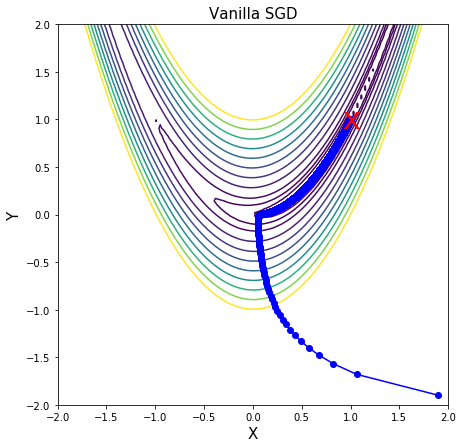

In [11]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

ps = np.array(ps)
plt.figure(figsize=(7,7))
levels = [0.1,1,2,4,9, 16, 25, 36, 49, 64, 81, 100]
Z = (1-X)**2 + 100*(Y-X**2)**2
c = plt.contour(X, Y, Z, levels)
plt.plot(ps[:, 0], ps[:, 1], '-bo')
plt.text(1, 1, 'x', va='center', ha='center', color='red', fontsize=30)
plt.title('Vanilla SGD', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
pass

In [12]:
ps = [x0]
opt.minimize(rosen, x0, method=sgd_momentum_ros, callback=reporter)

     fun: 1.2220138964293013e-08
    nfev: 100001
     nit: 100000
 success: True
       x: array([0.99988954, 0.99977866])

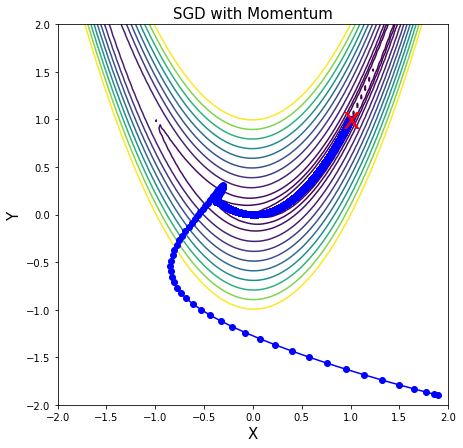

In [13]:
ps = np.array(ps)
plt.figure(figsize=(7,7))
levels = [0.1,1,2,4,9, 16, 25, 36, 49, 64, 81, 100]
Z = (1-X)**2 + 100*(Y-X**2)**2
c = plt.contour(X, Y, Z, levels)
plt.plot(ps[:, 0], ps[:, 1], '-bo')
plt.text(1, 1, 'x', va='center', ha='center', color='red', fontsize=30)
plt.title('SGD with Momentum', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)

pass

In [14]:
ps = [x0]
opt.minimize(rosen, x0, method=sgd_adam_ros, callback=reporter)

     fun: 2.4549227944484088e-08
    nfev: 28751
     nit: 28750
 success: True
       x: array([1.00000519, 0.99999472])

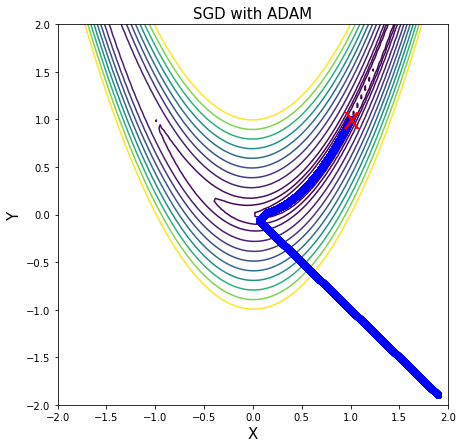

In [15]:
ps = np.array(ps)
plt.figure(figsize=(7,7))
levels = [0.1,1,2,4,9, 16, 25, 36, 49, 64, 81, 100]
Z = (1-X)**2 + 100*(Y-X**2)**2
c = plt.contour(X, Y, Z, levels)
plt.plot(ps[:, 0], ps[:, 1], '-bo')
plt.text(1, 1, 'x', va='center', ha='center', color='red', fontsize=30)
plt.title('SGD with ADAM', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)

pass